# UBER PROJECT

## First Steps

In [1]:
import os
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import folium
from folium.plugins import HeatMap

In [2]:
#!pip install chart_studio
#!pip install plotly
#!pip install folium

In [3]:
os.listdir(r"D:\Desktop\proyectos udemi\uber\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [4]:
df = pd.read_csv(r"D:\Desktop\proyectos udemi\uber\Datasets/uber-raw-data-janjune-15_sample.csv")
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140


In [5]:
#lets get an idea of what dataset we got and also the missing values!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Dispatching_base_num  100000 non-null  object
 1   Pickup_date           100000 non-null  object
 2   Affiliated_base_num   98882 non-null   object
 3   locationID            100000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


## Lets handle duplicated rows!

In [6]:
df.duplicated().sum()

54

In [7]:
df.drop_duplicates(inplace=True)

## Lets checkout NULL values!

In [8]:
#Only the Affiliated_base_num contains NANS
df.isna().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [9]:
df_isna = df.loc[df.isna().any(axis=1)]
df_isna

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
17,B02617,2015-02-11 17:12:08,NaN,170
76,B02598,2015-02-25 21:31:18,NaN,148
91,B02682,2015-01-23 06:48:09,NaN,231
240,B02764,2015-02-09 22:17:03,NaN,163
259,B02764,2015-01-16 06:53:00,NaN,144
...,...,...,...,...
99776,B02617,2015-02-25 23:41:07,NaN,17
99823,B02764,2015-02-15 19:35:12,NaN,52
99864,B02764,2015-01-17 22:24:45,NaN,114
99878,B02512,2015-02-06 07:10:57,NaN,13


In [10]:
#For now we are not gonna treat them.
# df.dropna(inplace = True)

## Lets Transform Columns to its correct dtype!

In [11]:
#Pickup_date is in str format so we have to convert it to datetime to be able to work with it
df['Pickup_date'] = pd.to_datetime(df['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

## LIST OF THINGS I WILL TRY TO FIND

1. **Peak Months**: Identify months with high demand for trips and also how those trips are distributed 

1. **Peak Hours**: Identify the hours of the day with the highest demand for trips and the locations where they occur most frequently.

2. **Geographical Distribution**: Analyze how trips are distributed based on locations (column 'locationID'). Are there geographical areas with significantly higher demand than others?

3. **Most Active Dispatch Bases**: Determine the dispatch bases ('Dispatching_base_num') that generate the majority of trips and if there is any significant variation among them.

4. **Driver Affiliation**: Investigate if drivers have a specific affiliation ('Affiliated_base_num') and if this has any impact on their activity.

5. **Temporal Distribution**: Analyze how trips are distributed over time, including daily and weekly patterns. Are there specific days of the week with higher demand?

6. **Average Trip Duration and Distance**: Calculate the average duration and distance of trips. This can provide information about trip efficiency.

7. **Relationship between Dispatch Bases and Locations**: Investigate if certain dispatch bases are more commonly used in specific locations and if this makes operational sense.

12. **Analysis of Weekdays and Weekends**: Compare trip demand and patterns between weekdays and weekends.

14. **Dispatch Base Efficiency**: Evaluate the efficiency of dispatch bases based on the number of trips generated and their location.



# INITIAL DATASET EXPLORATION


## Lets Analyse which month has the most pickups!

In [12]:
#lets take these features from the DateTime column
df['Month'] = df['Pickup_date'].dt.month_name()
df['DayOfWeek'] = df['Pickup_date'].dt.day_name()
df['Day'] = df['Pickup_date'].dt.day
df['Hour'] = df['Pickup_date'].dt.hour
df['Minute'] = df['Pickup_date'].dt.minute

In [13]:
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,DayOfWeek,Day,Hour,Minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,23,7,3


<AxesSubplot:>

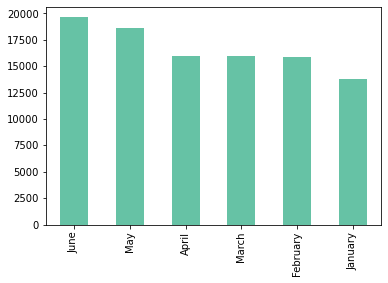

In [14]:
#Simple graph for pickups each month
sns.set_palette('Set2')
df['Month'].value_counts().plot(kind = 'bar')
#month_names = [calendar.month_name[i] for i in range(1, 7)]
#month_names

In [15]:
# Calculate the count of trips every month
monthly_counts = df['Month'].value_counts().sort_values()
monthly_counts

January     13819
February    15896
March       15969
April       15982
May         18660
June        19620
Name: Month, dtype: int64

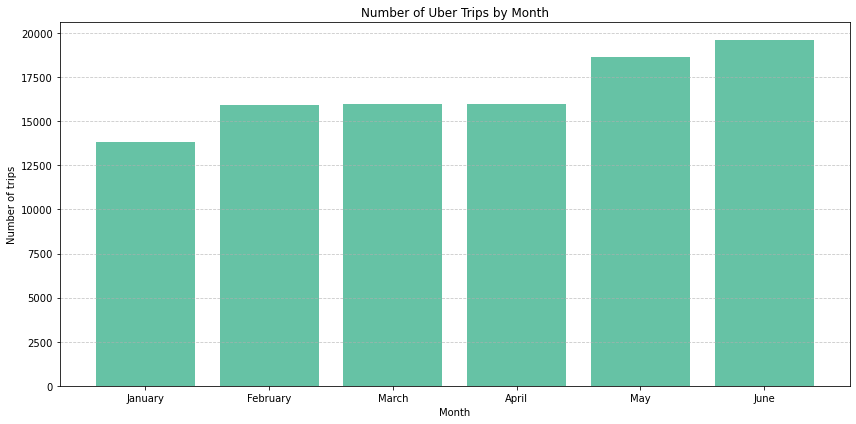

In [16]:
sns.set_palette('Set2')
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of trips')
plt.title('Number of Uber Trips by Month')

# Establecer las ubicaciones y etiquetas de los ticks en el eje X
plt.xticks(monthly_counts.index)

# Agregar una cuadrícula en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [17]:
#Create a pivot df to have pick ups count for day every month
pivot_df = pd.crosstab(index=df['Month'], columns=df['DayOfWeek'])
pivot_df

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


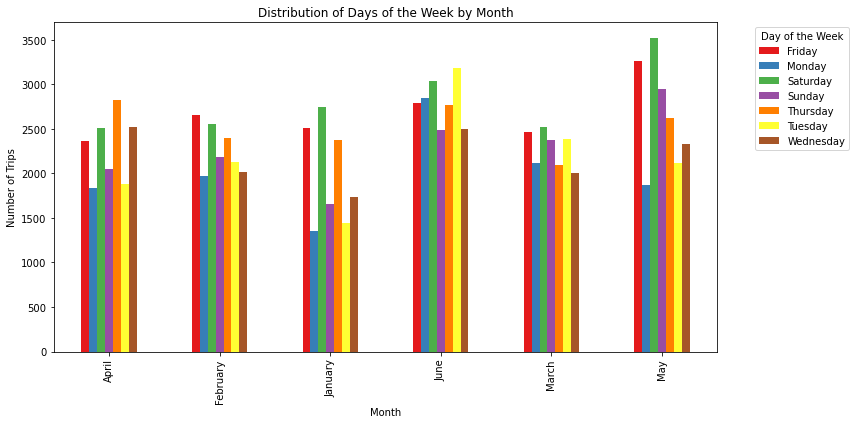

In [18]:
# Establish the pallete and the style
sns.set_palette('Set1')

# Create a graph with no stacked bars
pivot_df.plot(kind='bar', stacked=False, figsize=(12, 6))

# Labels and title
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Distribution of Days of the Week by Month')

# Legend out of the graph to avoid slopping
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the graph()
plt.tight_layout()
plt.show()

## Lets Analyse Rush Hour in New York!

In [19]:
summary = df.groupby(['DayOfWeek','Hour']).size().reset_index().rename(columns={0:'Size'})
summary.head()

,DayOfWeek,Hour,Size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161


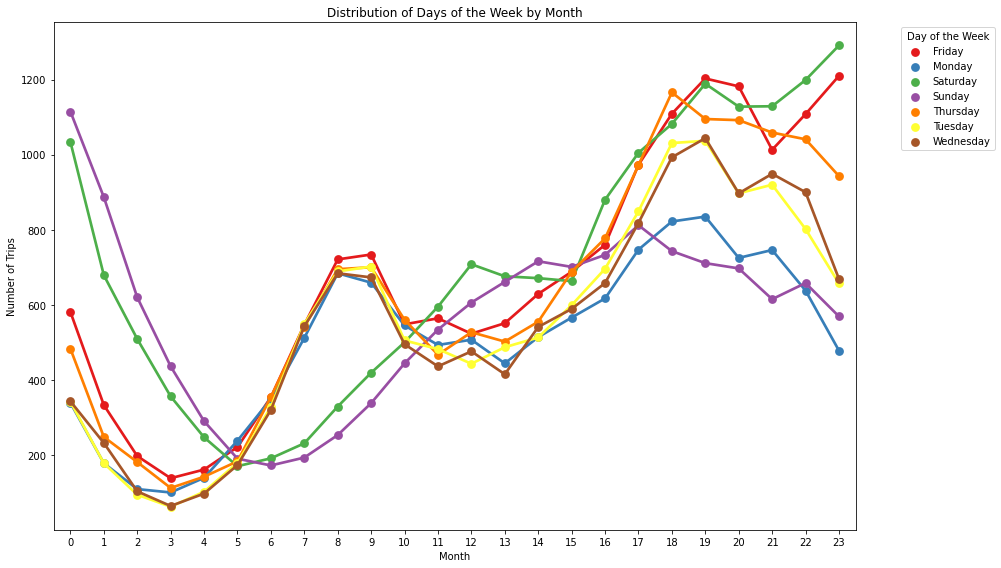

In [20]:
plt.figure(figsize=(14,8))
# Establish the pallete and the style
sns.set_palette('Set1')

# Create a graph with no stacked bars
sns.pointplot(data=summary, x='Hour', y='Size',hue='DayOfWeek')
# Labels and title
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Distribution of Days of the Week by Month')

# Legend out of the graph to avoid slopping
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the graph()
plt.tight_layout()
plt.show()

## Lets Analyse which base number has the most active vehicles!

In [21]:
#for that we are gonna need this CSV
df_2 = pd.read_csv(r"D:\Desktop\proyectos udemi\uber\Datasets/Uber-Jan-Feb-FOIL.csv")
df_2.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [22]:
df_2.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

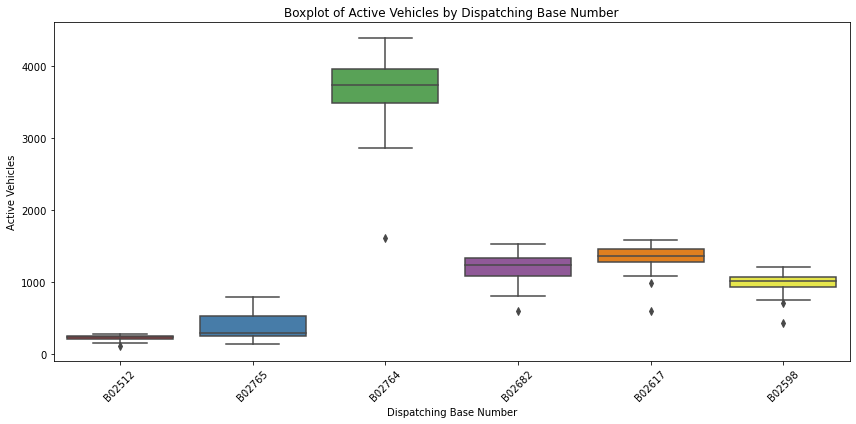

In [23]:
# Crea un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='dispatching_base_number', y='active_vehicles', data=df_2)
plt.xlabel('Dispatching Base Number')
plt.ylabel('Active Vehicles')
plt.title('Boxplot of Active Vehicles by Dispatching Base Number')

# Rotar etiquetas del eje X si es necesario
plt.xticks(rotation=45)

# Muestra el gráfico
plt.tight_layout()
plt.show()

### Lets do it with Plotly

In [24]:
init_notebook_mode(connected=True)

In [25]:
px.box(x='dispatching_base_number', y='active_vehicles', data_frame=df_2 )

In [26]:
#violin plot is a really good graph to check distributions
px.violin(x='dispatching_base_number', y='active_vehicles', data_frame=df_2 )

## Let´s Collect the entire data and make it ready for Data Analysis


In [27]:
#Lets grab all the Uber Raw Data. This is a list so we can use slicing [-8:]
files = os.listdir(r"D:\Desktop\proyectos udemi\uber\Datasets")[-8:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [28]:
#We are told to remove 2 csv from files
files.remove('uber-raw-data-janjune-15_sample.csv')

In [29]:
files.remove('uber-raw-data-janjune-15.csv')

In [30]:
# we want to have all of these files in a single dataframe
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [31]:
df_raw = pd.DataFrame()
path = r"D:\Desktop\proyectos udemi\uber\Datasets"
for file in files:
    current_df = pd.read_csv(path + '/' + file)
    df_raw = pd.concat([df_raw,current_df])

In [32]:
df_raw.shape

(4534327, 4)

### Let´s handle duplicated

In [33]:
df_raw.duplicated().sum()

82581

In [34]:
df_raw.drop_duplicates(inplace=True)

In [35]:
#df_raw.reset_index(inplace=True)

## Let´s perform Spatial Analysis to find rush of Uber Pick Ups!

In [36]:
#At what locations of New York City we are getting rush?
#for that we are gonna have to create a HEAT MAP based on LAT and LONG

In [37]:
df_raw.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [46]:
#df_raw.drop(columns='index',inplace = True)

In [ ]:
rush_df = df_raw.groupby(['Lat','Lon']).size().reset_index().rename(columns={0:'Size'})
rush_df

In [ ]:
#This gives us a basemap of the entire world
basemap = folium.Map()
basemap

In [ ]:
HeatMap(rush_df).add_to(basemap)

In [ ]:
basemap

## Perform Pair Wise Analysis to figure out Rush

In [ ]:
df_raw.head()

In [40]:
df_raw['Date/Time'][0]

0    4/1/2014 0:11:00
0    8/1/2014 0:03:00
0    7/1/2014 0:03:00
0    6/1/2014 0:00:00
0    5/1/2014 0:02:00
0    9/1/2014 0:01:00
Name: Date/Time, dtype: object

In [43]:
 df_raw['Date/Time'] = pd.to_datetime( df_raw['Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [44]:
df_raw['Month'] = df_raw['Date/Time'].dt.month_name()
df_raw['DayOfWeek'] = df_raw['Date/Time'].dt.day_name()
df_raw['Day'] = df_raw['Date/Time'].dt.day
df_raw['Hour'] = df_raw['Date/Time'].dt.hour
df_raw['Minute'] = df_raw['Date/Time'].dt.minute

In [45]:
df_raw.head(3)

,Date/Time,Lat,Lon,Base,Month,DayOfWeek,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21


In [59]:
 #interesante tabla, pero no es lo que queremos, queremos tener las horas en columnas
df_raw.groupby(['Day','Hour'],as_index = False).size()

,Day,Hour,size
0,1,0,3178
1,1,1,1944
2,1,2,1256
3,1,3,1308
4,1,4,1429
...,...,...,...
739,31,19,4898
740,31,20,4819
741,31,21,5064
742,31,22,5164


In [60]:
#asi tenemos las ocurrencias para cada dia y cada hora por linea
pivot_df = df_raw.groupby(['Day','Hour']).size().unstack()
pivot_df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,...,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,...,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,...,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,...,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,...,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518


In [61]:
#lets make the the pivot table prettier
pivot_df.style.background_gradient()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


## Automate Analysis for time and saving (pivot tables)

In [62]:
#For this we are gonna be using user defined functions
def pivot_tables (df,col1,col2):
    pivot_df = df_raw.groupby([col1,col2]).size().unstack()
    return pivot_df.style.background_gradient()

In [66]:
#With user defined functions we wont have to recode again, just use to functions for the columns we are asked for
pivot_tables(df_raw,'DayOfWeek','Hour')

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,,,,
Friday,13447,8002,5232,6788,8641,13168,22988,31522,30926,24803,23763,24727,25438,29822,35569,42910,47315,50997,53746,48657,42713,47389,48471,40498
Monday,6327,3679,2885,6106,9460,14737,23285,30650,28764,21854,19950,19973,20117,23005,27696,32201,38149,41351,36359,33512,32279,28401,19805,11588
Saturday,27096,18783,12464,9356,6746,6990,8450,10831,14176,17384,20218,22320,23879,26177,30851,38104,42735,42013,44995,40271,37922,42938,47107,42388
Sunday,32275,22610,15126,10393,6261,6086,6492,8584,11909,16113,19476,22410,23469,25937,27603,30570,32383,30951,27726,25419,24601,23539,19227,11998
Thursday,9116,5169,3629,5532,8355,13889,26561,36393,34856,27376,25502,25538,25983,30300,36048,43604,49615,55645,54768,50927,51044,50938,43381,27203
Tuesday,6116,3437,2502,4394,7404,13938,26361,35935,33304,24591,23273,23234,23392,28544,34234,40641,47849,54483,49258,43954,43875,39224,27211,14599
Wednesday,7499,4233,3060,4762,7379,13542,26462,35810,33231,25195,24273,24485,25083,28642,34512,42606,49764,54584,51732,46096,46875,43754,32222,17803
